# Creación de Campañas de Marketing

Creación de Dataset para campañas
Se crean `eventos`, para fraccionar las fechas que son típicas de campañas.

In [106]:
import pandas as pd
import numpy as np

# Eventos y sus fechas (inicio y fin)
eventos = {
    'Semana Santa': [(3, 20), (4, 20)],
    'Navidad': [(12, 10), (12, 31)],
    'Verano': [(6, 1), (8, 31)],
    'Primavera': [(3, 1), (5, 31)],
    'Otoño': [(9, 1), (11, 30)],
    'Invierno': [(12, 1), (12, 31)],
}

# Hoteles y configuraciones
hoteles = {
    'Parador de Cádiz': {
        'Region': 'Cádiz',
        'publico_objetivo': ['Familias', 'Parejas'],
        'eventos': ['Verano', 'Semana Santa']
    },
    'Eurostars Hotel de La Reconquista': {
        'Region': 'Asturias',
        'publico_objetivo': ['Jóvenes', 'Familias'],
        'eventos': ['Semana Santa', 'Navidad', 'Otoño']
    },
    'Gran Hotel Bali': {
        'Region': 'Benidorm',
        'publico_objetivo': ['Tercera Edad', 'Familias'],
        'eventos': ['Verano', 'Semana Santa', 'Primavera']
    },
    'Mandarin Oriental Ritz': {
        'Region': 'Madrid',
        'publico_objetivo': ['Parejas', 'Familias', 'Tercera Edad', 'Jóvenes'],
        'eventos': ['Navidad', 'Verano', 'Semana Santa', 'Otoño', 'Primavera', 'Invierno']
    },
    'Hotel Arts Barcelona': {
        'Region': 'Barcelona',
        'publico_objetivo': ['Familias', 'Parejas', 'Tercera Edad', 'Jóvenes'],
        'eventos': ['Navidad', 'Verano', 'Semana Santa', 'Otoño', 'Primavera', 'Invierno']
    }
}

def random_date_in_range(year, start, end):
    """Genera una fecha aleatoria entre start y end (mes, día), considerando cruces de año."""
    start_date = pd.Timestamp(year=year, month=start[0], day=start[1])
    # Ajustar para rangos que cruzan año
    if end[0] < start[0]:
        end_date = pd.Timestamp(year=year+1, month=end[0], day=end[1])
    else:
        end_date = pd.Timestamp(year=year, month=end[0], day=end[1])
    delta = (end_date - start_date).days
    random_day = np.random.randint(0, delta + 1)
    return start_date + pd.Timedelta(days=random_day), end_date

def evento_para_fecha(fecha, year):
    """Detecta a qué evento pertenece la fecha dada, según el diccionario eventos."""
    for evento, (start, end) in eventos.items():
        start_date = pd.Timestamp(year=year, month=start[0], day=start[1])
        if end[0] < start[0]:
            end_date = pd.Timestamp(year=year+1, month=end[0], day=end[1])
        else:
            end_date = pd.Timestamp(year=year, month=end[0], day=end[1])

        # Ajustar fecha si está en enero o febrero para eventos que cruzan año
        fecha_ajustada = fecha
        if fecha.month < start[0]:
            fecha_ajustada = fecha + pd.DateOffset(years=1)

        if start_date <= fecha_ajustada <= end_date:
            return evento.lower()
    return 'fuera de evento'

campanas_data = []

for year in range(2019, 2025):
    for hotel, config in hoteles.items():
        for i in range(2):
            eventos_hotel = config['eventos']

            evento_seleccionado = np.random.choice(eventos_hotel)
            start, end = eventos[evento_seleccionado]

            # Obtener fecha de inicio dentro del evento y fin evento
            fecha_inicio, fin_evento = random_date_in_range(year, start, end)

            # Generar fecha fin, al menos 5 días después de inicio pero sin pasar fin_evento
            min_fin_date = fecha_inicio + pd.Timedelta(days=5)
            if min_fin_date > fin_evento:
                # Si no queda margen, fin = fin_evento
                fecha_fin = fin_evento
                fecha_inicio = fecha_fin - pd.Timedelta(days=5)  # ajustar inicio atrás para 5 días min
            else:
                delta_fin = (fin_evento - min_fin_date).days
                fecha_fin = min_fin_date + pd.Timedelta(days=np.random.randint(0, delta_fin + 1))

            nombre_campana = f"{hotel} Campaña {year} - {i+1} {evento_seleccionado}"

            # Fechas de lanzamiento deben ser antes de fecha_inicio
            # Elegimos lanzamiento_fin entre 10 y 40 días antes de fecha_inicio
            max_lanz_fin_delta = fecha_inicio - pd.Timedelta(days=10)
            min_lanz_fin_delta = fecha_inicio - pd.Timedelta(days=40)
            inicio_ano = pd.Timestamp(f"{year}-01-01")
            if min_lanz_fin_delta < inicio_ano:
                min_lanz_fin_delta = inicio_ano

            delta_lanz_fin = (max_lanz_fin_delta - min_lanz_fin_delta).days
            if delta_lanz_fin <= 0:
                lanzamiento_fin = min_lanz_fin_delta
            else:
                lanzamiento_fin = min_lanz_fin_delta + pd.Timedelta(days=np.random.randint(0, delta_lanz_fin + 1))

            # Duración lanzamiento entre 10 y 30 días antes de lanzamiento_fin
            duracion_lanzamiento = np.random.randint(10, 31)
            lanzamiento_inicio = lanzamiento_fin - pd.Timedelta(days=duracion_lanzamiento)
            if lanzamiento_inicio < inicio_ano:
                lanzamiento_inicio = inicio_ano

            publico = np.random.choice(config['publico_objetivo'])
            region = config['Region']

            campanas_data.append([
                nombre_campana,
                lanzamiento_inicio,
                lanzamiento_fin,
                fecha_inicio,
                fecha_fin,
                publico,
                region,
                hotel
            ])

df = pd.DataFrame(
    campanas_data,
    columns=[
        'nombre',
        'lanzamiento_inicio',
        'lanzamiento_fin',
        'fecha_inicio',
        'fecha_fin',
        'publico_objetivo',
        'region',
        'hotel'
    ]
)

df.head(30)


,nombre,lanzamiento_inicio,lanzamiento_fin,fecha_inicio,fecha_fin,publico_objetivo,region,hotel
0,Parador de Cádiz Campaña 2019 - 1 Semana Santa,2019-02-08,2019-03-01,2019-04-05,2019-04-20,Parejas,Cádiz,Parador de Cádiz
1,Parador de Cádiz Campaña 2019 - 2 Semana Santa,2019-03-04,2019-03-19,2019-04-09,2019-04-19,Familias,Cádiz,Parador de Cádiz
2,Eurostars Hotel de La Reconquista Campaña 2019...,2019-03-01,2019-03-27,2019-04-12,2019-04-20,Jóvenes,Asturias,Eurostars Hotel de La Reconquista
3,Eurostars Hotel de La Reconquista Campaña 2019...,2019-11-02,2019-11-25,2019-12-26,2019-12-31,Jóvenes,Asturias,Eurostars Hotel de La Reconquista
4,Gran Hotel Bali Campaña 2019 - 1 Verano,2019-06-13,2019-07-07,2019-07-24,2019-08-19,Tercera Edad,Benidorm,Gran Hotel Bali
5,Gran Hotel Bali Campaña 2019 - 2 Verano,2019-07-13,2019-08-07,2019-08-26,2019-08-31,Tercera Edad,Benidorm,Gran Hotel Bali
6,Mandarin Oriental Ritz Campaña 2019 - 1 Invierno,2019-11-13,2019-11-28,2019-12-26,2019-12-31,Familias,Madrid,Mandarin Oriental Ritz
7,Mandarin Oriental Ritz Campaña 2019 - 2 Otoño,2019-09-26,2019-10-06,2019-11-07,2019-11-20,Parejas,Madrid,Mandarin Oriental Ritz
8,Hotel Arts Barcelona Campaña 2019 - 1 Primavera,2019-02-28,2019-03-15,2019-04-15,2019-05-27,Tercera Edad,Barcelona,Hotel Arts Barcelona
9,Hotel Arts Barcelona Campaña 2019 - 2 Primavera,2019-02-10,2019-02-25,2019-04-06,2019-05-08,Jóvenes,Barcelona,Hotel Arts Barcelona


In [107]:
import pandas as pd

# Hacer todo el dataset a lowercase
df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)

# Exportar a CSV
df.to_csv('../data/processed/campaing_data.csv', index=False)

C:\Users\Alumno_AI\AppData\Local\Temp\ipykernel_6728\1963646285.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)


## Gráfica para ver el público objetivo
Esta sección muestra visualmente cómo se distribuyen las campañas de marketing según el público objetivo de cada hotel. Así, es posible identificar qué segmentos (familias, parejas, jóvenes, etc.) son más frecuentemente objetivo de las campañas y en qué fechas se concentran.


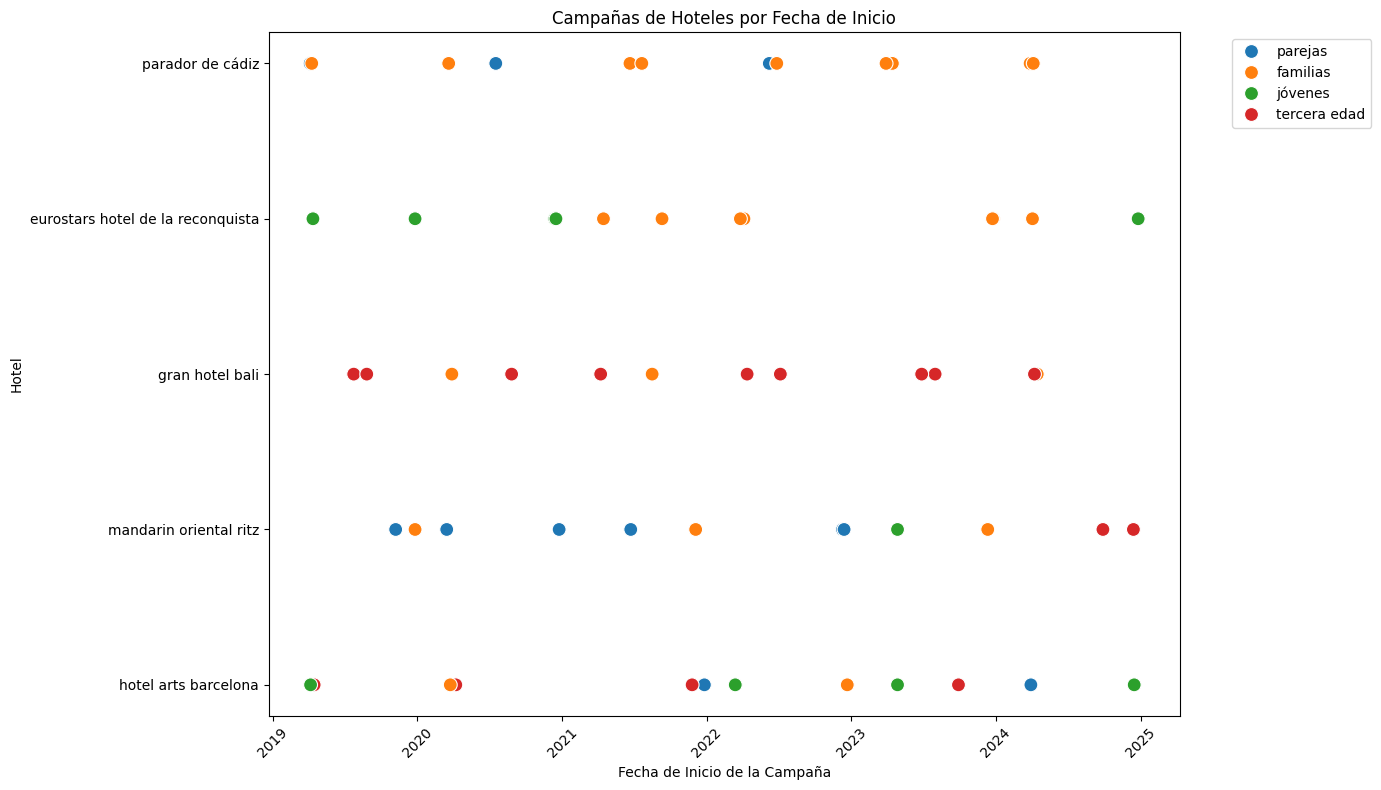

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 8))
sns.scatterplot(
    data=df,
    x='fecha_inicio',
    y='hotel',
    hue='publico_objetivo',
    s=100
)
plt.title('Campañas de Hoteles por Fecha de Inicio')
plt.xlabel('Fecha de Inicio de la Campaña')
plt.ylabel('Hotel')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## Gráfica para ver los rangos de fechas
Esta gráfica muestra, para cada campaña de hotel y año, dos intervalos clave: el periodo de lanzamiento (en azul) y el periodo de validez de la campaña (en naranja). El eje vertical representa cada campaña específica, mientras que el eje horizontal indica las fechas. Así, se visualiza claramente cuánto tiempo antes del inicio de la campaña se realiza el lanzamiento y cuánto dura la campaña activa, permitiendo comparar la planificación temporal entre hoteles y años.

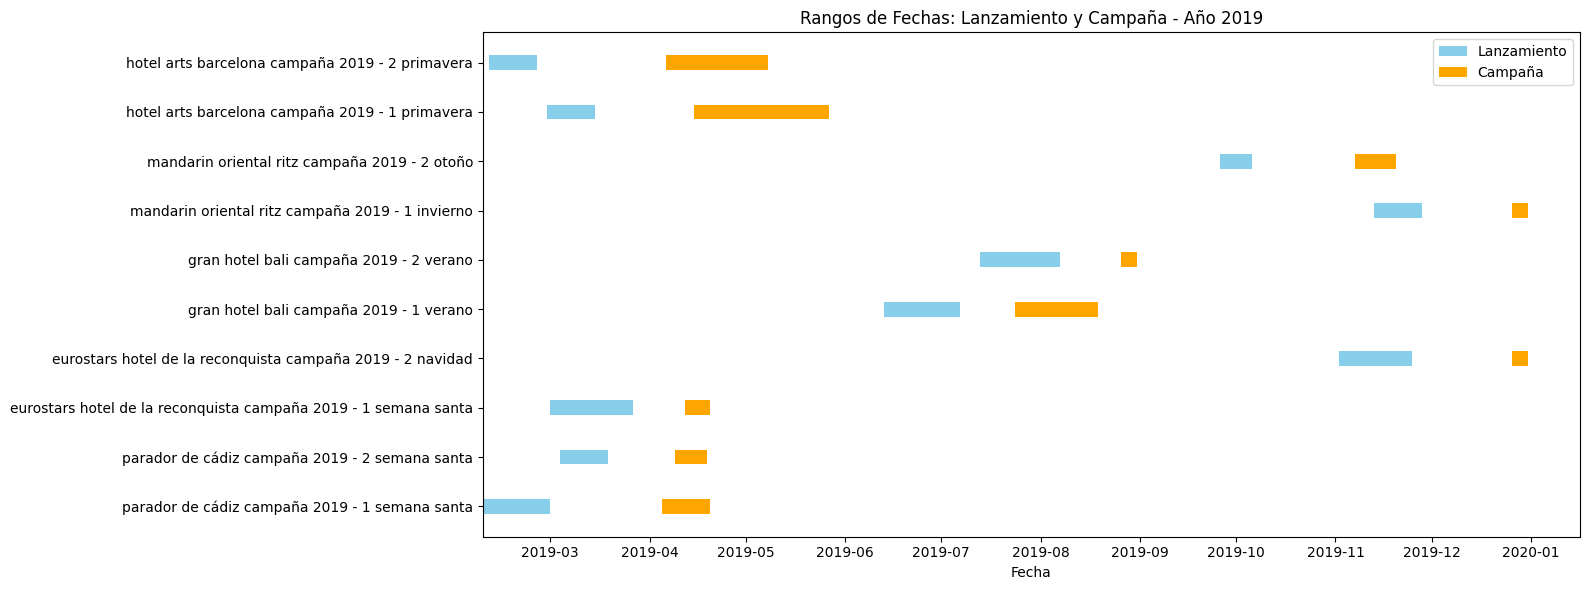

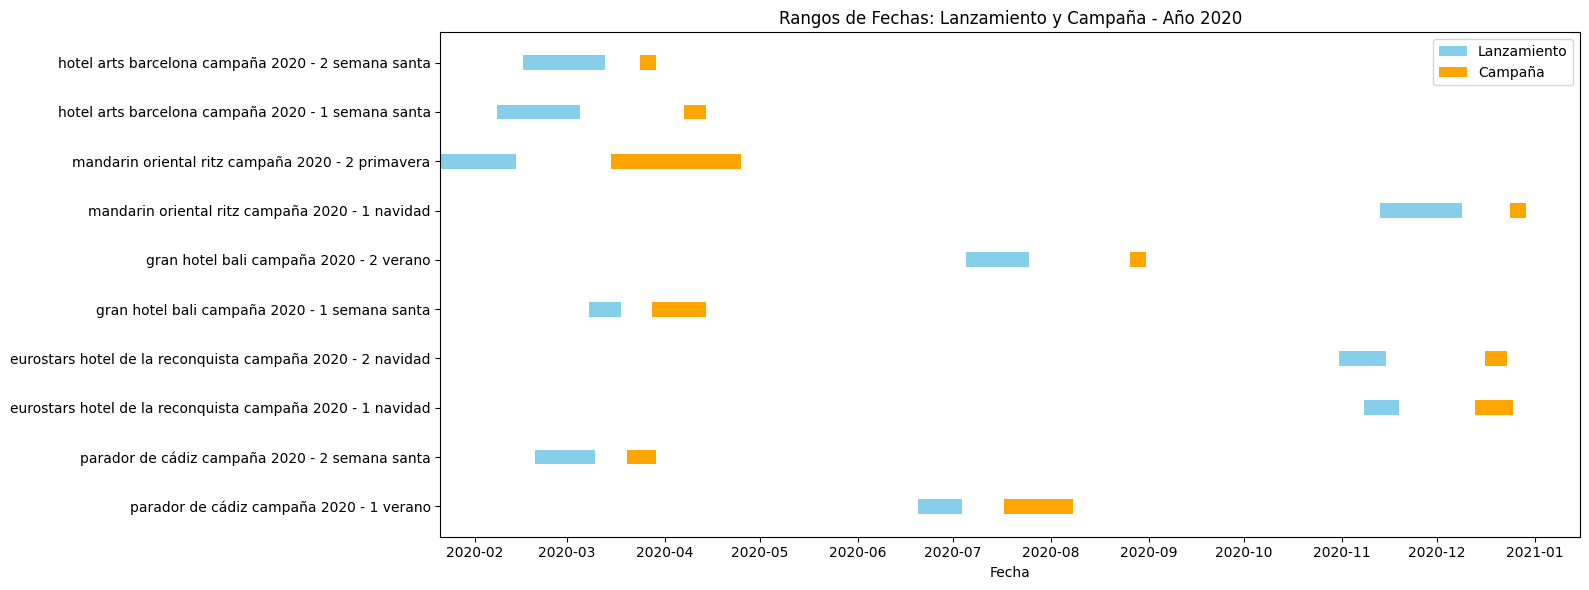

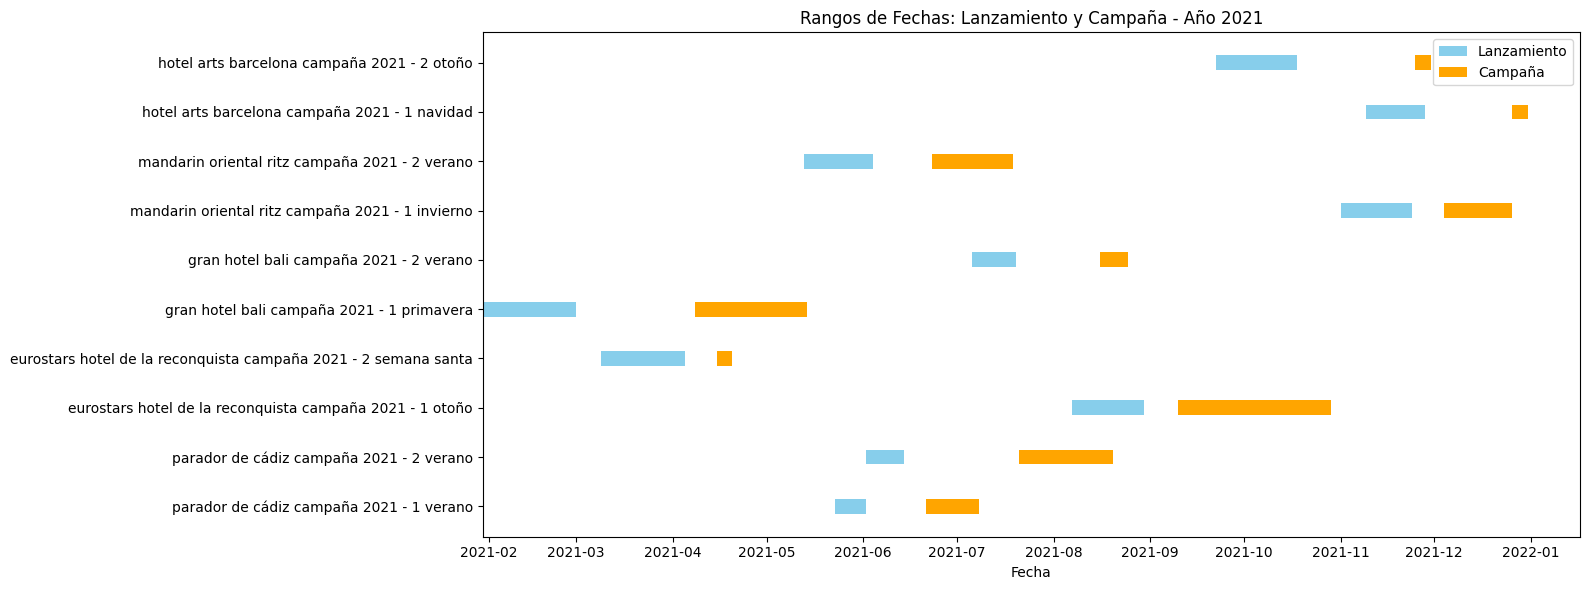

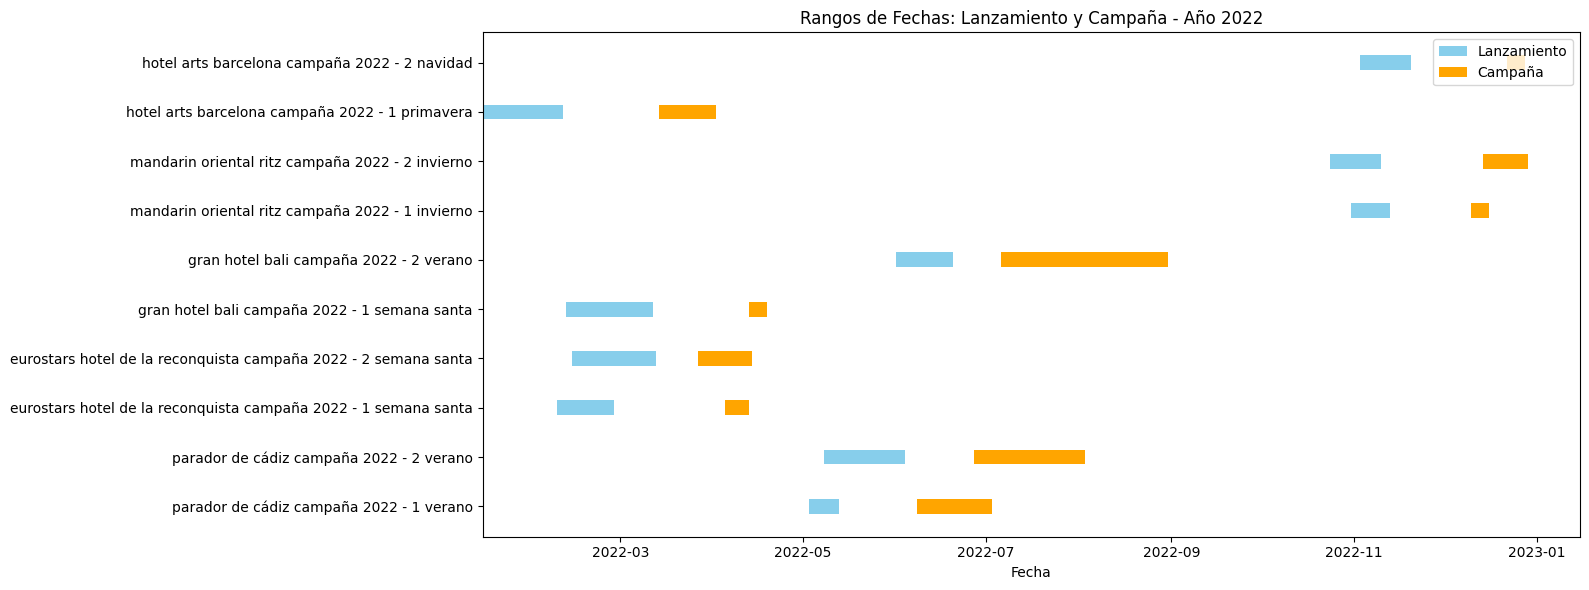

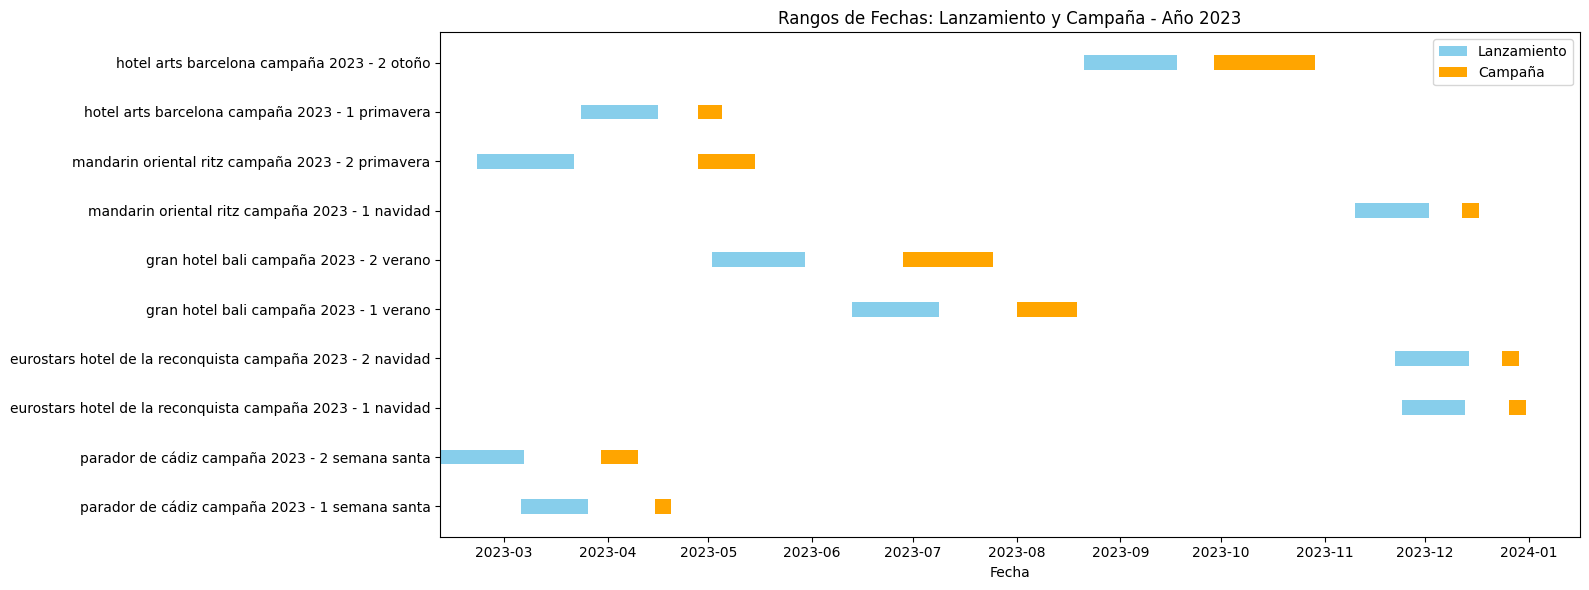

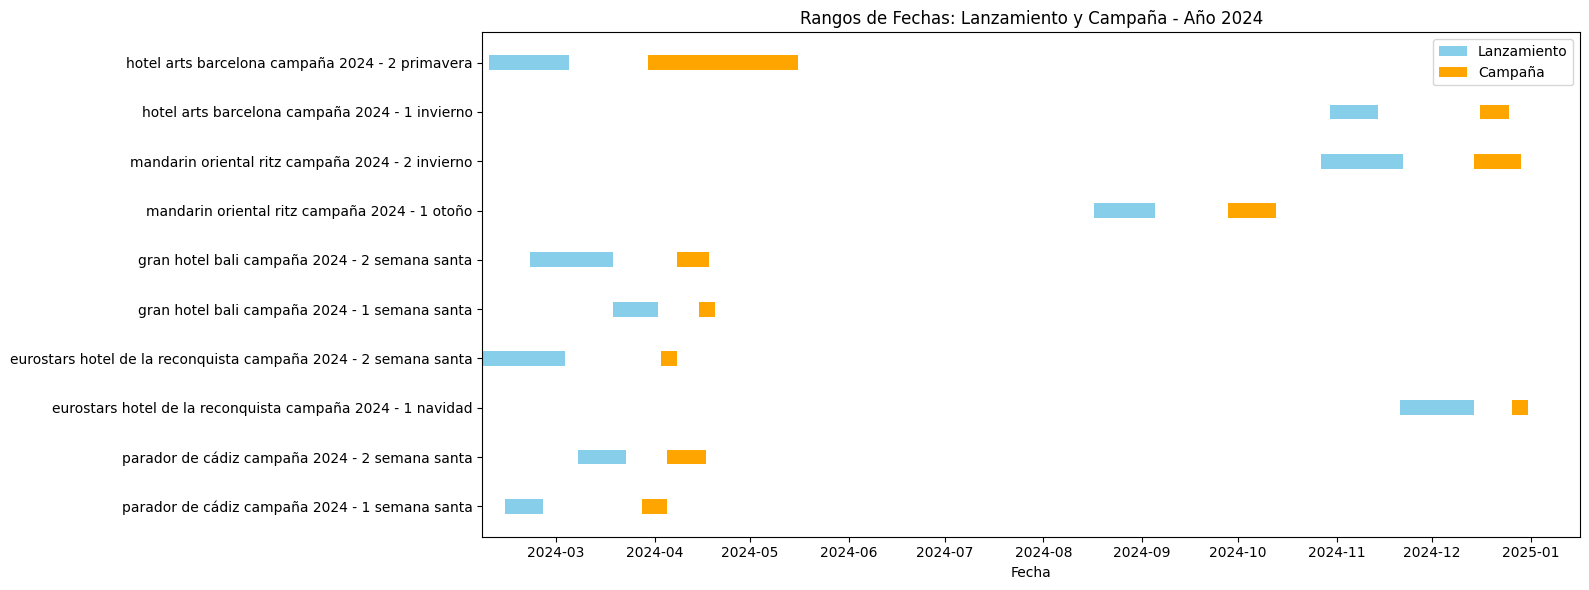

In [109]:
import matplotlib.pyplot as plt

años = df['fecha_inicio'].dt.year.unique()
años = sorted(años)

for year in años:
    df_year = df[df['fecha_inicio'].dt.year == year]
    
    plt.figure(figsize=(16, max(6, len(df_year)*0.3)))  # Ajusta altura según número de campañas
    
    for idx, (i, row) in enumerate(df_year.iterrows()):
        y = idx  # posición vertical para cada campaña
        
        # Barra lanzamiento
        plt.barh(y, (row['lanzamiento_fin'] - row['lanzamiento_inicio']).days,
                 left=row['lanzamiento_inicio'], height=0.3,
                 color='skyblue', label='Lanzamiento' if idx == 0 else "")
        
        # Barra campaña
        plt.barh(y, (row['fecha_fin'] - row['fecha_inicio']).days,
                 left=row['fecha_inicio'], height=0.3,
                 color='orange', label='Campaña' if idx == 0 else "")
    
    plt.yticks(range(len(df_year)), df_year['nombre'])
    plt.xlabel('Fecha')
    plt.title(f'Rangos de Fechas: Lanzamiento y Campaña - Año {year}')
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()
